# Yelp Reviews - NLP Project

Welcome to our NLP Project! We're diving into Yelp Reviews to categorize them as 1-star or 5-star ratings using Natural Language Processing with cool pipeline methods.

We've got the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013) – each row is a review of a business.

The 'stars' column rates the business from 1 to 5. 'Cool' votes show how much people liked the review, and 'useful'/'funny' columns reflect their helpfulness or humor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

c:\Users\Lor Studio\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Initially, we read the CSV file containing Yelp Reviews data and examine the first few rows of our dataset using the .head() function.

In [2]:
yelp = pd.read_csv('yelp.csv')
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


Next, we check out the stats with .info() and .describe().

In [3]:
yelp.info()
yelp.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


Let's add a 'text length' column to count the words in each sentence. This will help us separate and explore correlations between word count and spam or non-spam messages.

In [5]:
yelp['text length'] = yelp['text'].apply(lambda text: len(text.split(' ')))
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,160
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,256
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,16
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,75
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,85


### Time to dig into our data!

First up, let's check out the relationship between 'text length' and 'stars' rating with a histogram.

In [8]:
sns.set_style('white')

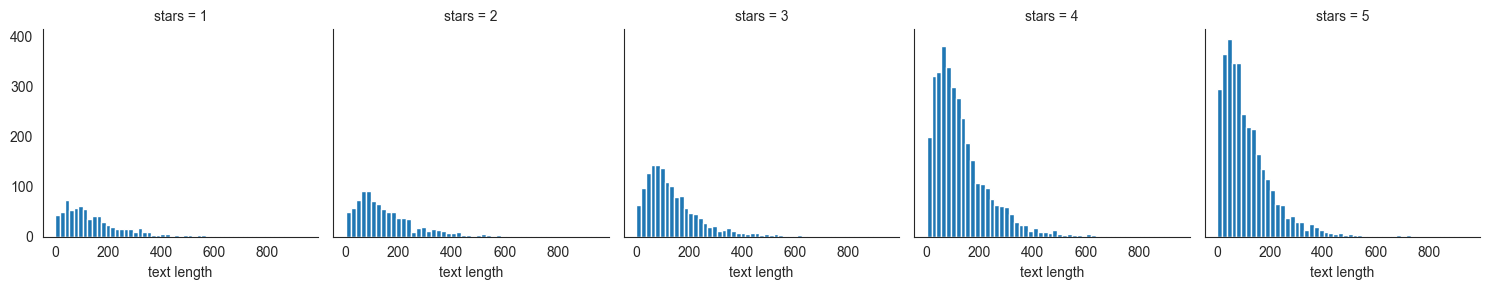

In [9]:
g = sns.FacetGrid(yelp, col='stars')
g.map(plt.hist, 'text length', bins=50)

Then, we'll dive deeper with a boxplot to see the average text length. And finally, a countplot will give us a quick view of the message count.

<Axes: xlabel='stars', ylabel='text length'>

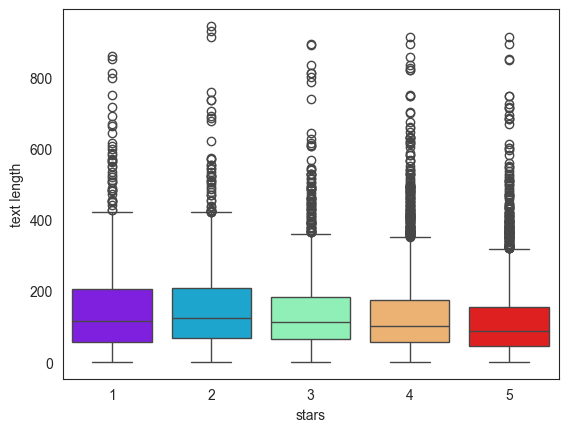

In [10]:
sns.boxplot(data=yelp, x='stars', y='text length', hue='stars', palette='rainbow', legend=False)

<Axes: xlabel='stars', ylabel='count'>

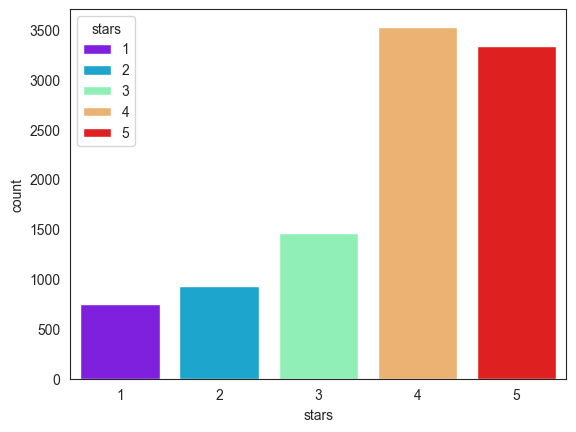

In [11]:
sns.countplot(data=yelp, x='stars', hue='stars', palette='rainbow')

As depicted in the preceding graphs, the average 'text length' hovers around 80-100 words across all 'stars' ratings. However, the notable distinction lies in the frequency distribution: higher ratings correlate with a greater number of occurrences. This suggests that individuals are more inclined to leave reviews if they have positive sentiments about the business, or they may opt not to leave a review at all.

it would be very helpful to explore the correlation between 'text length' and the review of the review itself (cool, useful, funny)

We create a new dataframe that aggregates mean values for each star rating and the text length.

In [22]:
stars = yelp.groupby('stars')[['cool', 'useful', 'funny', 'text length']].mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,156.013351
2,0.719525,1.563107,0.875944,158.508091
3,0.788501,1.306639,0.694730,143.043806
4,0.954623,1.395916,0.670448,132.921441
5,0.944261,1.381780,0.608631,116.054840


In [23]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.865650
useful,-0.743329,1.000000,0.894506,0.690255
funny,-0.944939,0.894506,1.000000,0.844066
text length,-0.865650,0.690255,0.844066,1.000000


<Axes: >

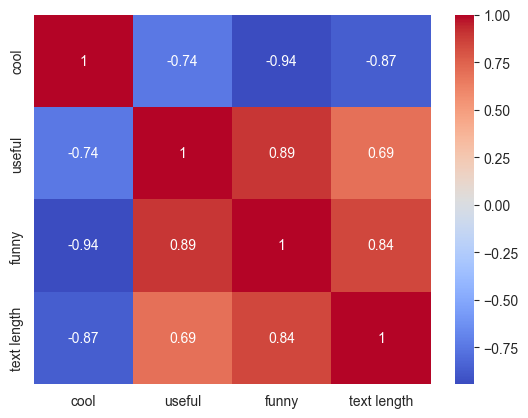

In [24]:
sns.heatmap(stars.corr(), cmap='coolwarm',annot=True)

Coolness appears to have a negative relationship with usefulness and humor, suggesting that what is perceived as cool may not always be seen as useful or funny. Additionally, there's a negative correlation between coolness and text length, indicating that shorter texts tend to be perceived as cooler.

Conversely, usefulness correlates positively with humor, implying that texts perceived as useful may also be considered humorous. Furthermore, usefulness also correlates positively with text length, suggesting that longer texts are often perceived as more useful.

### NLP Classification

Now, let's dive into NLP classification methods. We'll start by splitting the dataframe into X and y, focusing only on the 'text' and 'stars' columns.

In [93]:
X = yelp['text']
y = yelp['stars']

In [94]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

We utilize CountVectorizer for feature extraction, which converts text data into numerical features representing word counts, and MultinomialNB for classification, which applies the Multinomial Naive Bayes algorithm to make predictions based on the extracted features.

In [95]:
cv = CountVectorizer()
X_cv = cv.fit_transform(X)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_cv, y, test_size=0.3)

In [97]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [98]:
pred = nb.predict(X_test)

print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[ 59  25  30  70  37]
 [ 13  17  52 163  29]
 [  3  15  47 320  41]
 [  5   3  32 781 257]
 [  2   2   8 424 565]]


              precision    recall  f1-score   support

           1       0.72      0.27      0.39       221
           2       0.27      0.06      0.10       274
           3       0.28      0.11      0.16       426
           4       0.44      0.72      0.55      1078
           5       0.61      0.56      0.59      1001

    accuracy                           0.49      3000
   macro avg       0.46      0.35      0.36      3000
weighted avg       0.48      0.49      0.45      3000



Notably, ratings 1, 4, and 5 exhibit relatively higher precision scores, suggesting effective identification. However, ratings 2 and 3 show lower precision values, indicating challenges in accurate prediction. Similarly, while rating 4 demonstrates the highest recall, ratings 1, 2, and 3 exhibit lower recall values. The F1-score, balancing precision and recall, is highest for rating 5, indicating a good balance. Overall, the model achieves a moderate accuracy of 49%, suggesting room for improvement, particularly for ratings with lower precision and recall values.

As we've observed earlier in this project, our dataset is unbalanced in terms of rating occurrences.

To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

In [100]:
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  text length  4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [101]:
X1 = yelp_class['text']
y1 = yelp_class['stars']

In [102]:
cv2 = CountVectorizer()
X1_cv = cv2.fit_transform(X1)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X1_cv, y1, test_size=0.3)

In [104]:
nb2 = MultinomialNB()
nb2.fit(X_train, y_train)

MultinomialNB()

In [105]:
pred = nb2.predict(X_test)

In [106]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[158  64]
 [ 25 979]]


              precision    recall  f1-score   support

           1       0.86      0.71      0.78       222
           5       0.94      0.98      0.96      1004

    accuracy                           0.93      1226
   macro avg       0.90      0.84      0.87      1226
weighted avg       0.93      0.93      0.92      1226



The classification report for the subset of ratings 1 and 5 indicates strong performance, particularly in distinguishing between these two ratings.
With a precision of 0.86 for rating 1 and 0.94 for 5, the model demonstrates high accuracy in correctly identifying instances belonging to these ratings.
Additionally, the recall values of 0.71 for rating 1 and 0.98 for 5 signify the model's ability to effectively capture the majority of instances for each class.
The F1-scores further validate the model's robustness, with values of 0.78 for rating 1 and an impressive 0.96 for rating 5.

The overall accuracy of 0.93 indicates the model's proficiency in correctly classifying instances from the combined ratings 1 and 5. This suggests that the model performs exceptionally well in distinguishing between these two specific ratings, demonstrating its effectiveness in this subset of the dataset

In [107]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline

In [108]:
pipe = Pipeline([('bow', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

In [109]:
X_train, X_test, y_train, y_test = train_test_split(yelp_class['text'], yelp_class['stars'], test_size=0.3)

In [110]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', MultinomialNB())])

In [111]:
pred2 = pipe.predict(X_test)

In [112]:
print(confusion_matrix(y_test, pred2))
print('\n')
print(classification_report(y_test, pred2))

[[   2  219]
 [   0 1005]]


              precision    recall  f1-score   support

           1       1.00      0.01      0.02       221
           5       0.82      1.00      0.90      1005

    accuracy                           0.82      1226
   macro avg       0.91      0.50      0.46      1226
weighted avg       0.85      0.82      0.74      1226



In the first classification report, which utilized CountVectorizer directly, the precision, recall, and F1-score for rating 1 were notably lower compared to the second classification report where TF-IDF was applied. 
This difference suggests that applying TF-IDF resulted in perfect precision for rating 1, albeit at the cost of significantly lower recall and F1-score. Conversely, for rating 5, the precision, recall, and F1-score remained relatively consistent between the two reports. However, the macro-average and weighted-average F1-scores were notably higher in the first report compared to the second one.
This discrepancy indicates that while TF-IDF improved precision for rating 1, it also led to a decline in overall F1-score performance across the ratings. Therefore, the decision to incorporate TF-IDF into the classification pipeline should be carefully considered based on the specific requirements and trade-offs between precision and overall F1-score.